In [1]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 25, 12.5
rcParams['figure.dpi'] = 200

In [2]:
from cuml.manifold.umap import UMAP
import cudf
import pandas as pd
import numpy as np
import os

In [3]:
from timeit import default_timer

class Timer(object):
    def __init__(self):
        self._timer = default_timer
    
    def __enter__(self):
        self.start()
        return self

    def __exit__(self, *args):
        self.stop()

    def start(self):
        """Start the timer."""
        self.start = self._timer()

    def stop(self):
        """Stop the timer. Calculate the interval in seconds."""
        self.end = self._timer()
        self.interval = self.end - self.start

In [4]:
if not os.path.exists('fashion_mnist'):
    !git clone https://github.com/zalandoresearch/fashion-mnist.git fashion_mnist

In [5]:
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
train, train_labels = load_mnist('fashion_mnist/data/fashion', kind='train')
test, test_labels = load_mnist('fashion_mnist/data/fashion', kind='t10k')
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.array(np.hstack([train_labels, test_labels]))

In [7]:
df = pd.DataFrame({'fea%d'%i: data[:,i] for i in range(data.shape[1])})
gdf = cudf.DataFrame.from_pandas(df)

In [9]:
%%time
u = UMAP(n_neighbors=15, init = "spectral")
y_hat = u.fit_transform(gdf)

CPU times: user 13.4 s, sys: 3.48 s, total: 16.9 s
Wall time: 12.6 s


In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 12.5
rcParams['figure.dpi'] = 200

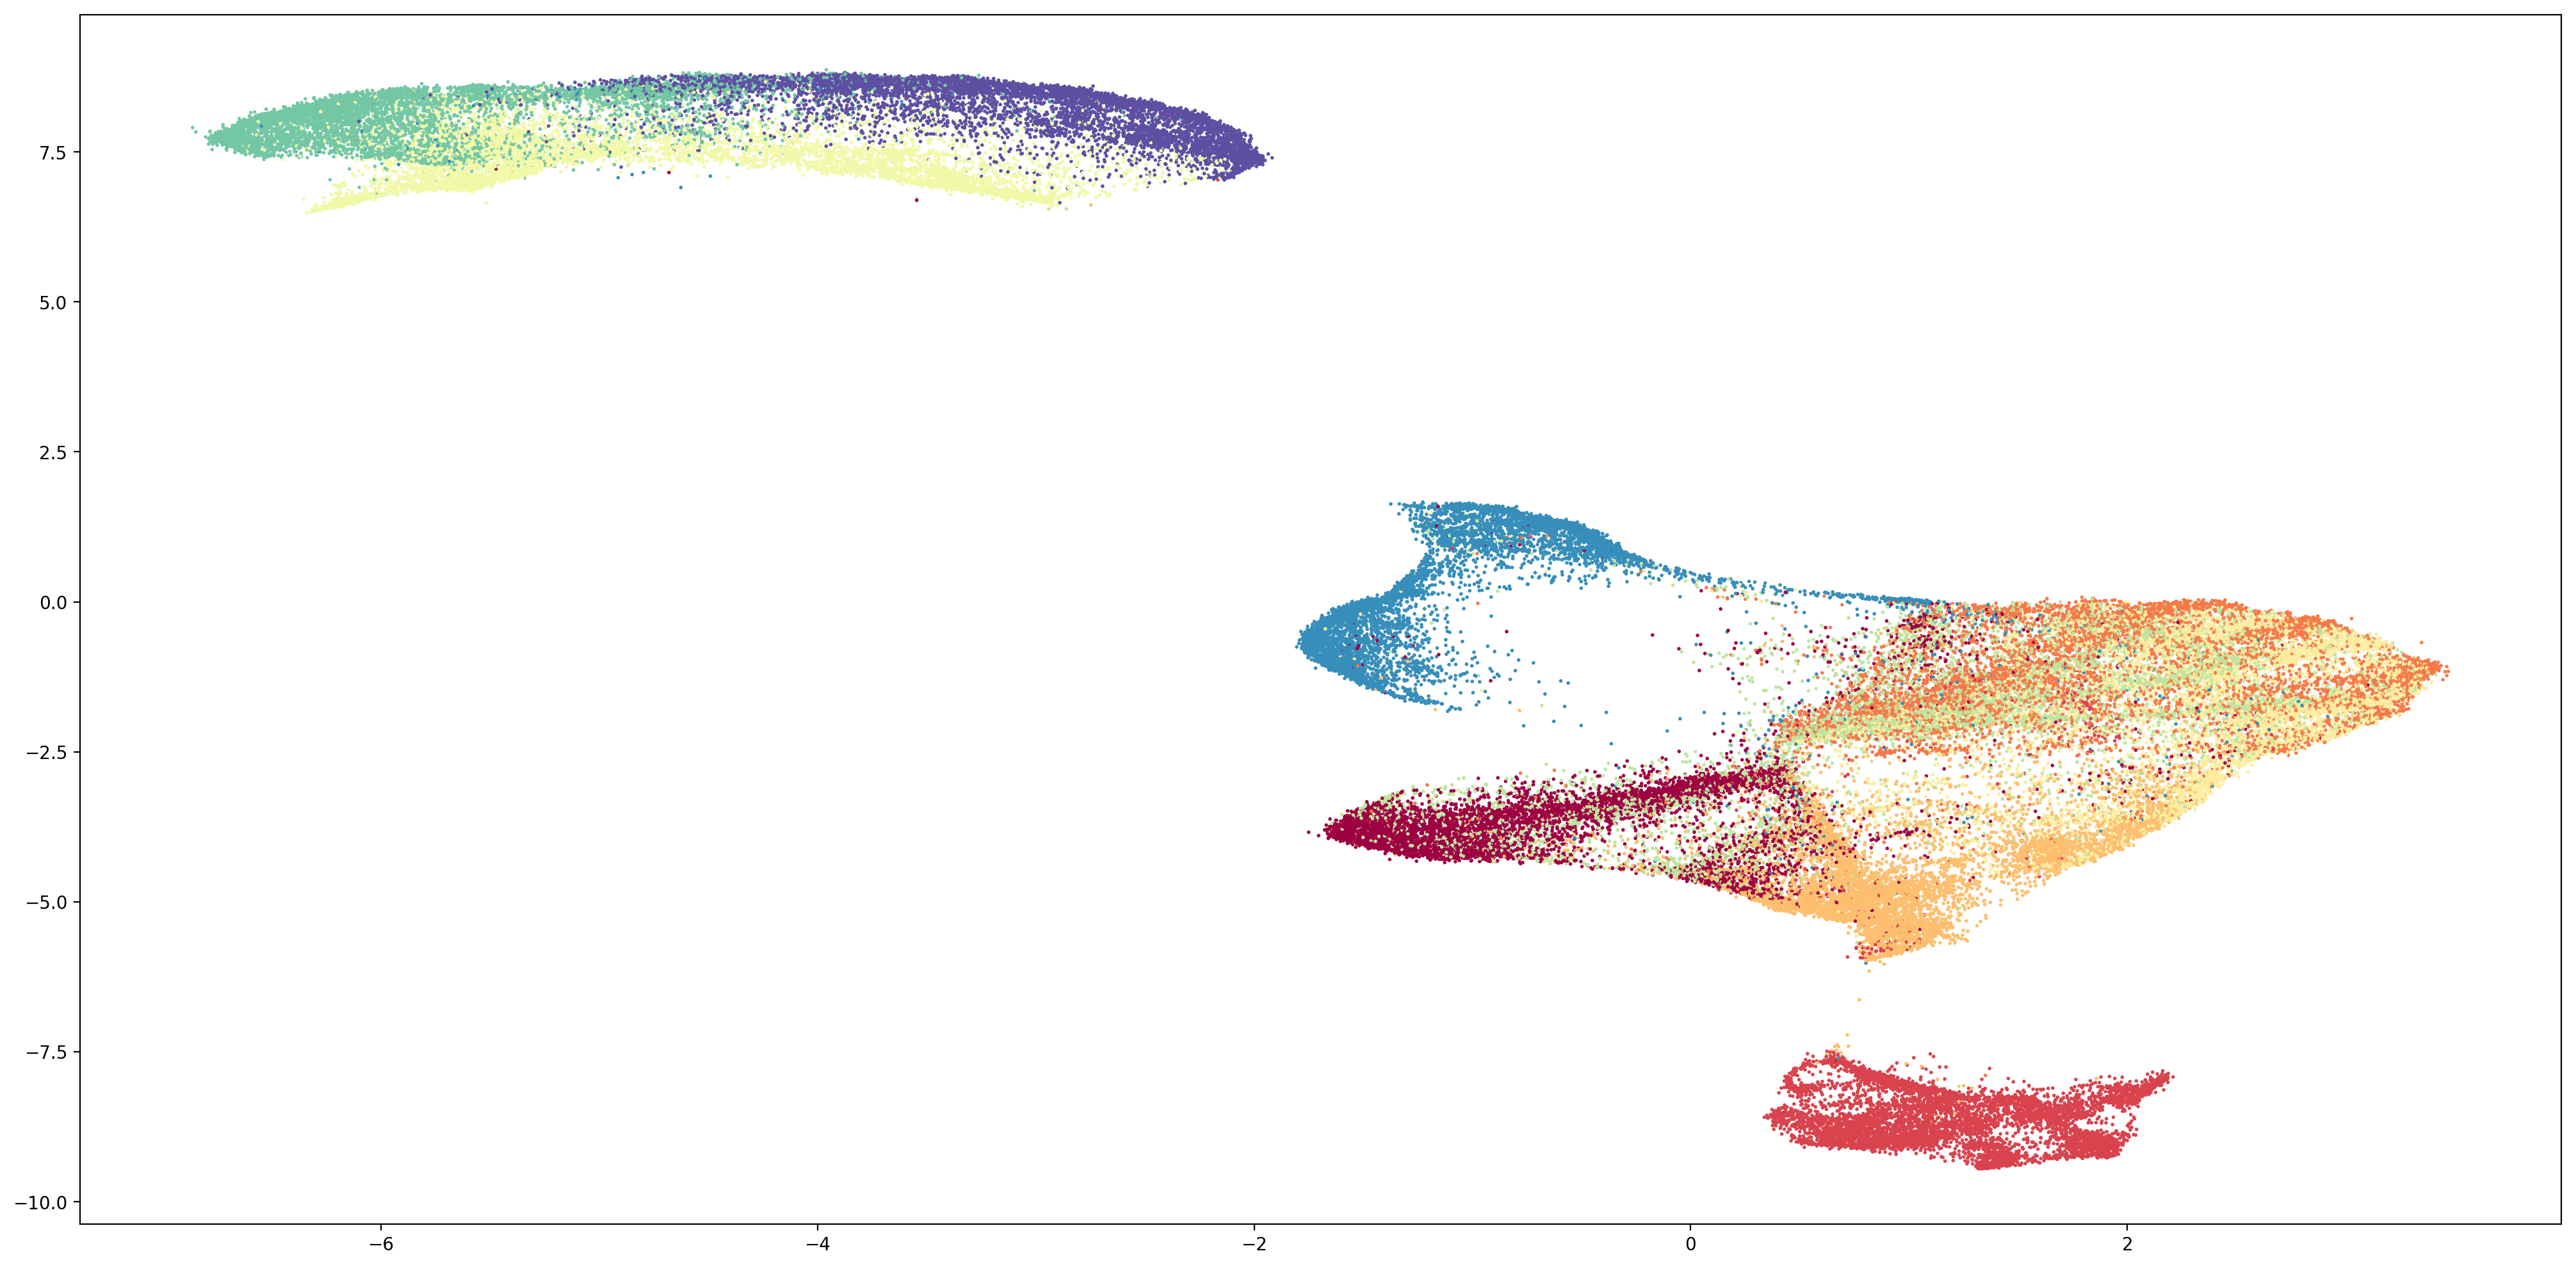

In [11]:
plt.scatter(y_hat[:,1], y_hat[:,0], c=target, cmap="Spectral", s=1)

In [12]:
%%time
import umap
u = umap.UMAP(n_neighbors = 15, init = "spectral", n_epochs = 1000)
u.fit_transform(data)

CPU times: user 6min 28s, sys: 13.5 s, total: 6min 41s
Wall time: 4min 50s
